# Import basis libraries

In [10]:
from dipole_inverse_tools import set_max_num_threads
set_max_num_threads(6)

In [11]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import dipole_inverse as dpinv

# Set basic parameters and paths
## You have to set the path yourself!

In [3]:
data_path = Path('./Example_data/')

# location and name of QDM and cuboid file
QDMfile = data_path / 'class_QDM_result2.txt'
cuboidfile = data_path / 'class_cuboid_result2.txt'

# size of QDM domain
QDM_domain = np.array([[300, 1250], [450, 1400]]) * 1e-6
# Spacing between two QDM sample points
QDM_spacing = 1.2e-6
# half length of QDM sensor
QDM_deltax = 0.6e-6
# half width of QDM sensor
QDM_deltay = 0.6e-6
# area of QDM sensor
QDM_area = 1.44e-12
# thickness of sample
sample_height = 80e-6
# distance between QDM and top sample
scan_height = 6e-6
# file to write magnetization grains to
Magfile = data_path / "grain_mag.txt"

# Initialize class

In [4]:
mag_svd = dpinv.Dipole(
    QDMfile, cuboidfile, QDM_domain, QDM_spacing,
    QDM_deltax, QDM_deltay, QDM_area, sample_height,
    scan_height)

# Calculate magnetization

In [5]:
!ls /home/david/miniconda3/lib/python3.8/site-packages/dipole_inverse/cython_lib/

pop_matrix_lib.cpython-38-x86_64-linux-gnu.so


In [6]:
mag_svd.obtain_magnetization(method_populate='cython', method_inverse='scipy_pinv2')

[[-5.91133706e-24 -5.96539894e-24  3.28667825e-23 ... -9.12501315e-25
  -4.51911930e-25  2.02880273e-25]
 [-5.98810471e-24 -6.09712315e-24  3.32948382e-23 ... -9.34134404e-25
  -4.68053201e-25  1.98776133e-25]
 [-6.06555794e-24 -6.23185697e-24  3.37283080e-23 ... -9.56233361e-25
  -4.84815189e-25  1.94273624e-25]
 ...
 [-6.45874798e-24 -6.95066501e-24  3.59774637e-23 ... -1.07359044e-24
  -5.78680998e-25  1.64953049e-25]
 [-6.53830291e-24 -7.10386416e-24  3.64438215e-23 ... -1.09843497e-24
  -5.99643740e-25  1.57564010e-25]
 [-6.61817017e-24 -7.26014703e-24  3.69157459e-23 ... -1.12373479e-24
  -6.21401899e-25  1.49611165e-25]]
Start inversion with 15876 knowns and 297 unknowns
Inversion has been carried out


In [7]:
mag_svd.Forward_G

array([[-5.91133706e-24, -5.96539894e-24,  3.28667825e-23, ...,
        -9.12501315e-25, -4.51911930e-25,  2.02880273e-25],
       [-5.98810471e-24, -6.09712315e-24,  3.32948382e-23, ...,
        -9.34134404e-25, -4.68053201e-25,  1.98776133e-25],
       [-6.06555794e-24, -6.23185697e-24,  3.37283080e-23, ...,
        -9.56233361e-25, -4.84815189e-25,  1.94273624e-25],
       ...,
       [ 1.42618674e-20,  1.76272473e-20, -7.42037749e-21, ...,
         4.95027230e-25,  1.10720805e-24,  1.66493590e-25],
       [ 1.41739838e-20,  1.57806884e-20, -6.02978137e-21, ...,
         5.00082958e-25,  1.08893001e-24,  1.69685846e-25],
       [ 1.38631248e-20,  1.40364639e-20, -4.75211303e-21, ...,
         5.04687376e-25,  1.07061259e-24,  1.72879425e-25]])

In [6]:
mag_svd.obtain_magnetization(method_populate='numba', method_inverse='scipy_pinv2')

Particle = 1 Cuboid = 0
Particle = 2 Cuboid = 36
Particle = 3 Cuboid = 57
Particle = 4 Cuboid = 104
Particle = 5 Cuboid = 131
Particle = 6 Cuboid = 146
Particle = 7 Cuboid = 261
Particle = 8 Cuboid = 269
Particle = 9 Cuboid = 281
Particle = 10 Cuboid = 325
Particle = 11 Cuboid = 343
Particle = 12 Cuboid = 354
Particle = 13 Cuboid = 403
Particle = 14 Cuboid = 405
Particle = 15 Cuboid = 410
Particle = 16 Cuboid = 427
Particle = 17 Cuboid = 429
Particle = 18 Cuboid = 430
Particle = 19 Cuboid = 432
Particle = 20 Cuboid = 433
Particle = 21 Cuboid = 435
Particle = 22 Cuboid = 450
Particle = 23 Cuboid = 452
Particle = 24 Cuboid = 456
Particle = 25 Cuboid = 464
Particle = 26 Cuboid = 476
Particle = 27 Cuboid = 478
Particle = 28 Cuboid = 482
Particle = 29 Cuboid = 497
Particle = 30 Cuboid = 506
Particle = 31 Cuboid = 511
Particle = 32 Cuboid = 519
Particle = 33 Cuboid = 544
Particle = 34 Cuboid = 578
Particle = 35 Cuboid = 593
Particle = 36 Cuboid = 598
Particle = 37 Cuboid = 645
Particle = 38 

In [7]:
mag_svd.Forward_G

array([[-5.91133706e-24, -5.96539894e-24,  3.28667825e-23, ...,
        -9.12501315e-25, -4.51911930e-25,  2.02880273e-25],
       [-5.98810471e-24, -6.09712315e-24,  3.32948382e-23, ...,
        -9.34134404e-25, -4.68053201e-25,  1.98776133e-25],
       [-6.06555794e-24, -6.23185697e-24,  3.37283080e-23, ...,
        -9.56233361e-25, -4.84815189e-25,  1.94273624e-25],
       ...,
       [ 1.42618674e-20,  1.76272473e-20, -7.42037749e-21, ...,
         4.95027230e-25,  1.10720805e-24,  1.66493590e-25],
       [ 1.41739838e-20,  1.57806884e-20, -6.02978137e-21, ...,
         5.00082958e-25,  1.08893001e-24,  1.69685846e-25],
       [ 1.38631248e-20,  1.40364639e-20, -4.75211303e-21, ...,
         5.04687376e-25,  1.07061259e-24,  1.72879425e-25]])

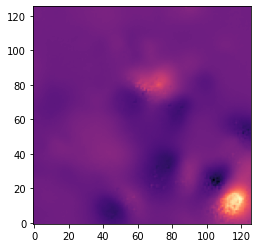

In [14]:
plt.imshow(mag_svd.QDM_matrix, origin='lower', cmap='magma')

In [15]:
mag_svd.Mag

array([ 6.65701292e+07, -2.49983831e+08,  8.38868803e+07,  1.10708590e+09,
       -2.66223025e+09,  2.91420718e+09, -1.71167597e+09,  5.07737513e+08,
       -5.55639092e+07, -2.64767936e+07,  1.89069472e+08, -4.68401690e+08,
        3.07562892e+08,  7.95582250e+08, -2.05581037e+09,  2.10661815e+09,
       -1.06703142e+09,  2.18812677e+08,  7.97901223e+07,  2.88671289e+08,
       -3.06178512e+09,  8.87287794e+09, -1.37433419e+10,  1.29859007e+10,
       -7.59278843e+09,  2.54797143e+09, -3.77264196e+08,  1.00972248e+08,
       -3.71945646e+08,  4.35065754e+08, -3.05376633e+08,  1.17753895e+09,
       -3.00875314e+09,  3.47892130e+09, -1.92889809e+09,  4.22487760e+08,
        5.29597018e+08, -2.94139756e+09,  7.47134899e+09, -1.15893226e+10,
        1.21422419e+10, -8.74324197e+09,  4.14204431e+09, -1.15130911e+09,
        1.40081559e+08, -1.27264239e+08,  1.00120855e+09, -3.69347873e+09,
        8.12463011e+09, -1.14692671e+10,  1.05567682e+10, -6.16678513e+09,
        2.08688661e+09, -

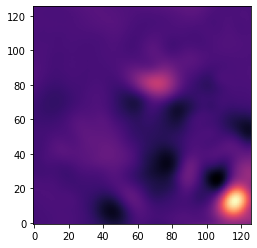

In [8]:
plt.imshow((mag_svd.Forward_G @ mag_svd.Mag).reshape(mag_svd.Ny, -1),
           origin='lower', cmap='magma')

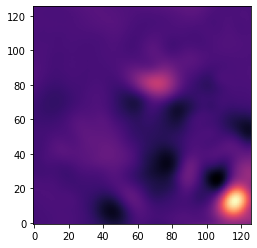

In [8]:
plt.imshow((mag_svd.Forward_G @ mag_svd.Mag).reshape(mag_svd.Ny, -1),
           origin='lower', cmap='magma')

In [13]:
mag_svd.Mag.shape

(297,)

In [25]:
mag_svd.cuboids[:, 6][:100]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

# Plots

In [26]:
from matplotlib.collections import PolyCollection
import matplotlib
import scipy.interpolate as si

import shapely.geometry as shg
import shapely.ops as sho

In [29]:
DipoleIns.cuboids

array([[4.36767293e-04, 1.39227790e-03, 1.09476146e-05, ...,
        9.88642163e-07, 2.96592649e-06, 1.00000000e+00],
       [4.39733219e-04, 1.39227790e-03, 7.98168811e-06, ...,
        9.88642163e-07, 1.97728433e-06, 1.00000000e+00],
       [4.37755935e-04, 1.38041419e-03, 1.19362568e-05, ...,
        9.88642163e-07, 1.97728433e-06, 1.00000000e+00],
       ...,
       [4.13318804e-04, 1.29727838e-03, 5.89709151e-05, ...,
        1.45548257e-06, 1.45548257e-06, 9.80000000e+01],
       [4.16229769e-04, 1.29727838e-03, 6.04263977e-05, ...,
        1.45548257e-06, 2.91096513e-06, 9.80000000e+01],
       [4.03439081e-04, 1.30122766e-03, 6.01840228e-05, ...,
        9.29996854e-07, 1.85999371e-06, 9.90000000e+01]])

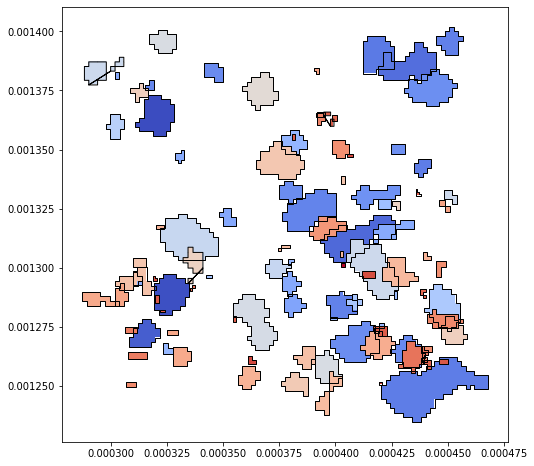

In [77]:
f, ax = plt.subplots(figsize=(8, 8))

DipoleIns = mag_svd

x, y, dx, dy = (DipoleIns.cuboids[:, i] for i in (0, 1, 3, 4))
grain_vertices = np.column_stack((x - dx, y - dy,
                                  x + dx, y - dy,
                                  x + dx, y + dy,
                                  x - dx, y + dy))
grain_vertices.shape = (-1, 4, 2)

col = PolyCollection(grain_vertices)

# Color by particle magnetization:
mag = np.linalg.norm(DipoleIns.Mag.reshape(-1, 3), axis=1)
cuboid_idxs = mag_svd.cuboids[:, 6].astype(np.int32)
cuboid_idxs_unique, cuboid_idxs_counts = np.unique(cuboid_idxs,
                                                   return_counts=True)

mag_per_cuboid = np.repeat(mag, cuboid_idxs_counts)
col.set(array=np.log(mag_per_cuboid), cmap='coolwarm', 
        # clim=(1e2, 1e8)
        )
p = ax.add_collection(col)

# -------------------------------------------------------------------
grain_geoms = []
for p in cuboid_idxs_unique:
    polygons = map(shg.Polygon,
                   grain_vertices[cuboid_idxs == p])
    # Some of the joined polygons might result in a Multipolygon!
    # Here we join all the polygons. The buffer is necessary to remove
    # odd looking lines appearing within a shape/polygon
    grain_geoms.append(
        sho.unary_union([shg.Polygon(pt.exterior).buffer(0.00000001,
                                                         cap_style=3,
                                                         join_style=shg.JOIN_STYLE.mitre)
                         for pt in polygons]))

# Now get the coordinates of every grain geometry. If we have a
# Multipolygon, we get the coordinates from separate entities
# We save every geometry in a dictionary entry
grain_geoms_coords = {}
for i, pg in enumerate(grain_geoms):
    idx = cuboid_idxs_unique[i]  # get index of the grain

    if pg.type == 'MultiPolygon':
        grain_geoms_coords[idx] = np.empty((0, 2))
        for pol in pg:
            coords = pol.exterior.coords.xy
            grain_geoms_coords[idx] = np.vstack(
                (grain_geoms_coords[idx],
                 np.column_stack(coords)))
    else:
        coords = pg.exterior.coords.xy
        grain_geoms_coords[idx] = np.column_stack(coords)

# ---------------------------------------------------------------------

for i, pg_key in enumerate(grain_geoms_coords):
    # We can use i to colour the grain
    col = PolyCollection([grain_geoms_coords[pg_key]],
                         # fc=cmap(i + 1),
                         fc=(0, 0, 0, 0),
                         ec=(0, 0, 0, 1),
                         )
    p = ax.add_collection(col)



ax.autoscale()

In [56]:
cuboid_idxs = mag_svd.cuboids[:, 6].astype(np.int32)
unique, counts = np.unique(cuboid_idxs, return_counts=True)
mag_per_cuboid = np.repeat(mag, counts)

array([9.33084648e+02, 9.33084648e+02, 9.33084648e+02, ...,
       7.41974585e+09, 7.41974585e+09, 4.34092232e+10])

# Save magnetization and make plots
##### If you do not want plots of the original magnetic field, forward field, residual field, or grain magnetization simply change to:
>mag_svd.save_results(Magfile)

In [ ]:
mag_svd.save_results(Magfile, path)